In [ ]:
# 나눔 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 폰트 설정
plt.rcParams["font.family"] = 'NanumBarunGothic'

In [1]:
from google.colab import drive
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import os
import numpy as np

import matplotlib.font_manager as fm

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


#모델 불러오기 (Resnet18)

In [3]:
import torch
import torchvision.models as models

# ResNet-18 모델을 초기화합니다.
model = models.resnet18()

# 불러올 체크포인트 파일 경로를 지정합니다.
checkpoint_path = '/content/drive/MyDrive/food/부트캠프 미션1 50 parameter.pt'

# 저장된 모델 가중치를 불러옵니다.
checkpoint = torch.load(checkpoint_path)

# 모델의 가중치를 불러온 체크포인트로 업데이트합니다.
model.load_state_dict(checkpoint['model_state_dict'], strict=False)

_IncompatibleKeys(missing_keys=['fc.weight', 'fc.bias'], unexpected_keys=['fc.0.weight', 'fc.0.bias'])

#모델 분석

In [4]:
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn # 인공 신경망 모델들 모아놓은 모듈
import torch.nn.functional as F #그중 자주 쓰이는것들을 F로
from torchvision import transforms, datasets
import cv2
import pandas as pd
import os
from glob import glob
import torchvision.models as models
import sys
import librosa, librosa.display
from torch.utils.data import random_split, DataLoader
from torchvision.datasets import ImageFolder
from sklearn.model_selection import train_test_split
#from pytorchtools import EarlyStopping


if torch.cuda.is_available():
    DEVICE = torch.device('cuda')
else:
    DEVICE = torch.device('cpu')
#DEVICE = torch.device('cpu')
print('Using Pytorch version : ',torch.__version__,' Device : ',DEVICE)

Using Pytorch version :  2.1.0+cu121  Device :  cuda


In [5]:
#3. 하이퍼 파라미터
BATCH_SIZE =  64 #한 배치당 64개 이미지데이터
EPOCHS = 50# 전체 데이터 셋을 50번 반복

In [6]:
test_data_dir = '/content/drive/MyDrive/food/val'
transform_test = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize
    transforms.ToTensor(),  # Convert to a tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize
])
test_dataset = ImageFolder(root=test_data_dir, transform=transform_test)

test_loader = DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=8)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [7]:
classes=['갈비구이','갈치구이','감자전','경단','계란국','계란말이','계란후라이','고등어구이','곱창구이','김밥','김치볶음밥',
              '김치전', '꿀떡','누룽지','닭갈비','더덕구이','동그랑땡','떡갈비','떡국_만두국','무국','미역국','북엇국','불고기','비빔밥',
              '삼겹살','새우볶음밥','생선전','송편','시래기국','알밥','유부초밥','육개장','잡곡밥','장어국이','조개구이','조기구이','주먹밥',
              '콩나물국','파전','호박전','황태구이','훈제오리']

In [8]:
#9. 학습 진행하며, validation 데이터로 모델 성능확인
def evaluate(model,valid_loader):
    model.eval()
    model.to("cuda")
    misclassified_images = []

    correct = 0
    #no_grad : 그래디언트 값 계산 막기.
    with torch.no_grad():
        for image, label in valid_loader:
            image = image.to(DEVICE)
            label = label.to(DEVICE)
            output = model(image)

            prediction = output.max(1,keepdim=True)[1] # 가장 확률이 높은 class 1개를 가져온다.그리고 인덱스만
            for i in range(label.size(0)):
                if prediction[i] != label[i]:
                    misclassified_images.append((image[i], prediction[i], label[i]))

        return misclassified_images

In [9]:
misclassified_images = evaluate(model, test_loader)

In [10]:
class_counts = {i: 0 for i in range(len(classes))}

for image, predicted_label, true_label in misclassified_images:
    if predicted_label == true_label:
        continue
    class_counts[true_label.item()] += 1

for i, count in class_counts.items():
    print(f"Class {classes[i]}: {count} misclassified images")

Class 갈비구이: 85 misclassified images
Class 갈치구이: 99 misclassified images
Class 감자전: 99 misclassified images
Class 경단: 94 misclassified images
Class 계란국: 97 misclassified images
Class 계란말이: 110 misclassified images
Class 계란후라이: 99 misclassified images
Class 고등어구이: 93 misclassified images
Class 곱창구이: 103 misclassified images
Class 김밥: 111 misclassified images
Class 김치볶음밥: 98 misclassified images
Class 김치전: 115 misclassified images
Class 꿀떡: 104 misclassified images
Class 누룽지: 98 misclassified images
Class 닭갈비: 85 misclassified images
Class 더덕구이: 95 misclassified images
Class 동그랑땡: 84 misclassified images
Class 떡갈비: 103 misclassified images
Class 떡국_만두국: 98 misclassified images
Class 무국: 115 misclassified images
Class 미역국: 98 misclassified images
Class 북엇국: 86 misclassified images
Class 불고기: 106 misclassified images
Class 비빔밥: 90 misclassified images
Class 삼겹살: 111 misclassified images
Class 새우볶음밥: 96 misclassified images
Class 생선전: 113 misclassified images
Class 송편: 107 misclassified imag

잘못 분류한 이미지들 중 클래스별로 랜덤으로 5장씩 뽑아서 확인


Class 갈비구이:


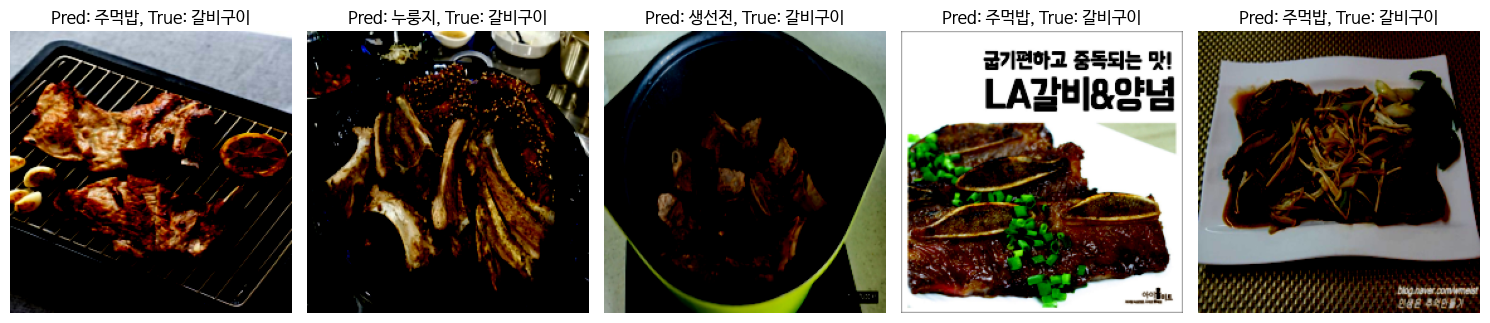


Class 갈치구이:


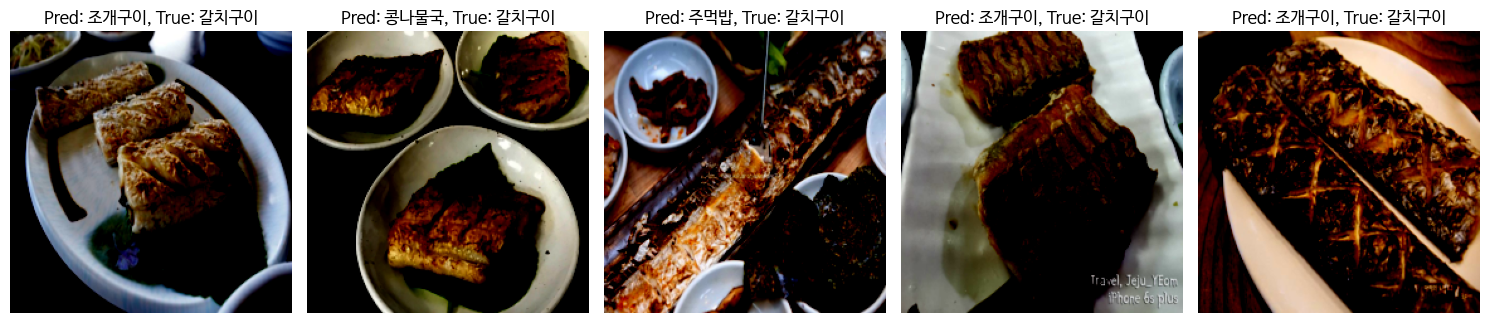


Class 감자전:


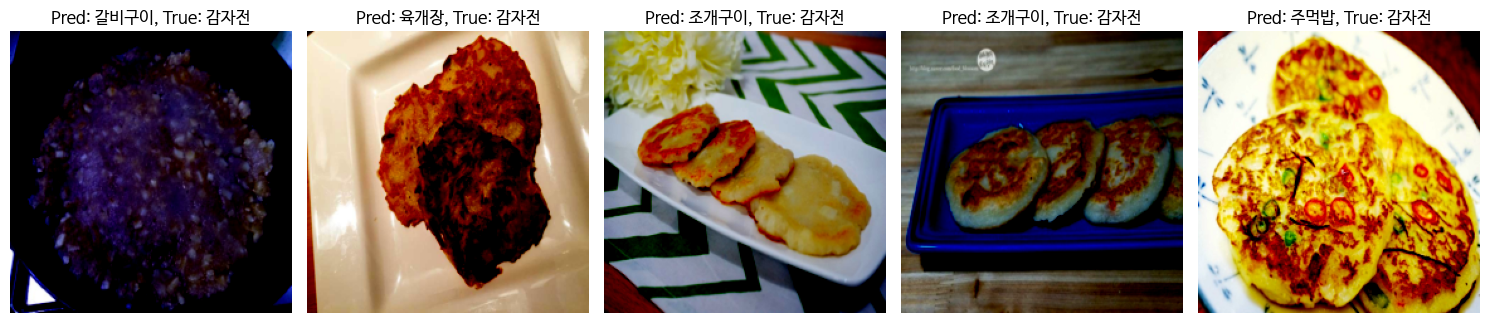

In [11]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'NanumBarunGothic'

for i in range(len(classes[:3])): #여기서 classes[:3]을 classes로 하면 전체 클래스별로 각 5개씩 잘못 분류한 이미지 볼 수 있다.
    misclassified_images_class = [(image, predicted_label, true_label) for image, predicted_label, true_label in misclassified_images if true_label == i]

    if not misclassified_images_class:
        continue

    # Print class name
    print(f"\nClass {classes[i]}:")

    # Display misclassified images
    num_images = min(5, len(misclassified_images_class))
    fig, axes = plt.subplots(1, num_images, figsize=(15, 4))

    for j, (image, predicted_label, true_label) in enumerate(misclassified_images_class[:num_images]):
        #print(f"True: {true_label}")

        # Reshape the image tensor and convert it to a NumPy array
        image = image.permute(1, 2, 0).cpu().numpy()

        # Display the image with adjusted size
        axes[j].imshow(image)
        axes[j].set_title(f"Pred: {classes[predicted_label%42]}, True: {classes[true_label]}")
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

In [12]:
# 예측 및 잘못 분류된 이미지 수 계산
misclassified_images = []  # 불러온 checkpoint에서 misclassified_images 리스트를 불러오는 코드가 필요합니다.

with torch.no_grad():
    for images, labels in test_loader:  # 새로운 데이터를 불러올 DataLoader를 이용하여 데이터를 불러옴
        images = images.to(DEVICE)  # 데이터를 디바이스로 이동
        labels = labels.to(DEVICE)

        outputs = model(images)  # 모델을 사용하여 예측 수행
        _, predicted = torch.max(outputs, 1)  # 가장 높은 확률을 갖는 클래스를 예측값으로 선택

        # 정확도를 계산하거나 잘못 분류된 이미지를 저장할 수 있음
        for i in range(len(labels)):
            if predicted[i] != labels[i]:
                misclassified_images.append((images[i], predicted[i], labels[i]))

잘못 분류한 이미지들을 각 클래스별로 분포 확인

{'갈비구이': 85, '갈치구이': 99, '감자전': 99, '경단': 94, '계란국': 97, '계란말이': 110, '계란후라이': 99, '고등어구이': 93, '곱창구이': 103, '김밥': 111, '김치볶음밥': 98, '김치전': 115, '꿀떡': 104, '누룽지': 98, '닭갈비': 85, '더덕구이': 95, '동그랑땡': 84, '떡갈비': 103, '떡국_만두국': 98, '무국': 115, '미역국': 98, '북엇국': 86, '불고기': 106, '비빔밥': 90, '삼겹살': 111, '새우볶음밥': 96, '생선전': 113, '송편': 107, '시래기국': 108, '알밥': 93, '유부초밥': 108, '육개장': 122, '잡곡밥': 103, '장어국이': 90, '조개구이': 92, '조기구이': 90, '주먹밥': 113, '콩나물국': 92, '파전': 103, '호박전': 85, '황태구이': 94, '훈제오리': 113}


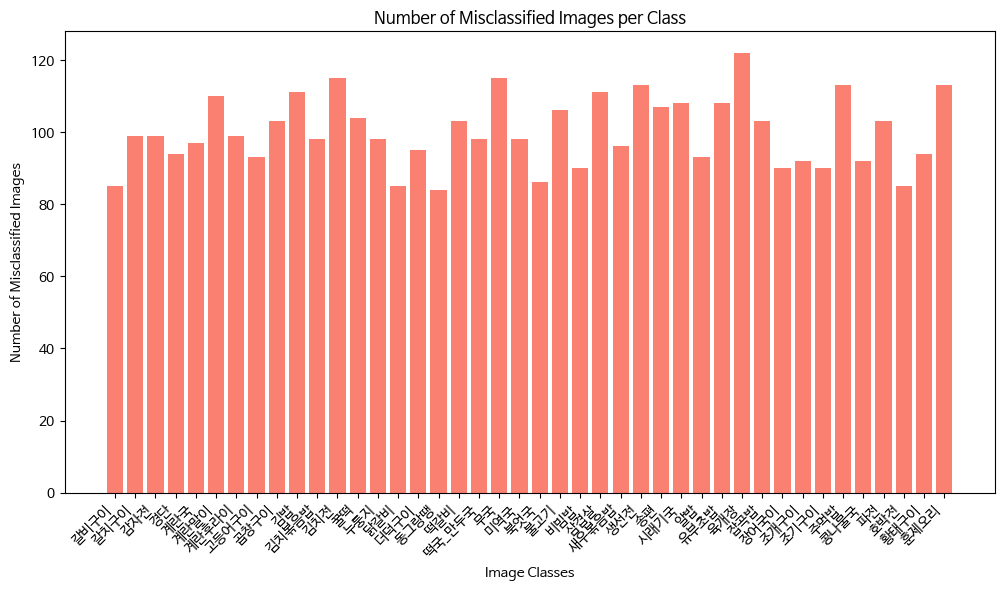

In [13]:
class_misclassified = {class_name: 0 for class_name in classes}

for _, prediction, label in misclassified_images:
    class_name = classes[label]
    class_misclassified[class_name] += 1
print(class_misclassified)
# 그래프 그리기
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(class_misclassified.keys(), class_misclassified.values(), color='salmon')
plt.title('Number of Misclassified Images per Class')
plt.xlabel('Image Classes')
plt.ylabel('Number of Misclassified Images')
plt.xticks(rotation=45, ha='right')
plt.show()

#모델 성능 증가

In [14]:
train_data_dir='/content/drive/MyDrive/food/train'
# Create the ImageFolder dataset
transform = transforms.Compose([
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(degrees=(-25, 25)),
    transforms.ColorJitter(brightness=0.6, contrast=0.2, saturation=0.2, hue=0.2),
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])
dataset = ImageFolder(root=train_data_dir, transform=transform)

# training and validation sets 의 size 정의
train_size = int(0.8 * len(dataset))  # 80% for training
val_size = len(dataset) - train_size  # Remaining for validation

#training and validation sets 분할
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

#training and validation datasets DataLoaders  생성
train_loader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=4)
validation_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=4)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [15]:
import torch
import torchvision.models as models
import torch.nn as nn

model = models.resnet18()
checkpoint = torch.load('/content/drive/MyDrive/food/부트캠프 미션1 50 parameter.pt')  # Load the checkpoint

# Load the checkpoint weights into the model
model.load_state_dict(checkpoint,strict=False)

_IncompatibleKeys(missing_keys=['conv1.weight', 'bn1.weight', 'bn1.bias', 'bn1.running_mean', 'bn1.running_var', 'layer1.0.conv1.weight', 'layer1.0.bn1.weight', 'layer1.0.bn1.bias', 'layer1.0.bn1.running_mean', 'layer1.0.bn1.running_var', 'layer1.0.conv2.weight', 'layer1.0.bn2.weight', 'layer1.0.bn2.bias', 'layer1.0.bn2.running_mean', 'layer1.0.bn2.running_var', 'layer1.1.conv1.weight', 'layer1.1.bn1.weight', 'layer1.1.bn1.bias', 'layer1.1.bn1.running_mean', 'layer1.1.bn1.running_var', 'layer1.1.conv2.weight', 'layer1.1.bn2.weight', 'layer1.1.bn2.bias', 'layer1.1.bn2.running_mean', 'layer1.1.bn2.running_var', 'layer2.0.conv1.weight', 'layer2.0.bn1.weight', 'layer2.0.bn1.bias', 'layer2.0.bn1.running_mean', 'layer2.0.bn1.running_var', 'layer2.0.conv2.weight', 'layer2.0.bn2.weight', 'layer2.0.bn2.bias', 'layer2.0.bn2.running_mean', 'layer2.0.bn2.running_var', 'layer2.0.downsample.0.weight', 'layer2.0.downsample.1.weight', 'layer2.0.downsample.1.bias', 'layer2.0.downsample.1.running_mean',

In [16]:
import torch.optim as optim
from torch.optim.lr_scheduler import CosineAnnealingLR

criterion = nn.CrossEntropyLoss()
weight_decay = 1e-4
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [17]:
model.train()

for epoch in range(EPOCHS):
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    # Calculate and print training loss and accuracy for the epoch
    train_loss = running_loss / len(train_loader)
    train_accuracy = 100.0 * correct_train / total_train

    # Validation
    model.eval()
    running_val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for inputs, labels in validation_loader:
            outputs = model(inputs)
            val_loss = criterion(outputs, labels)

            running_val_loss += val_loss.item()
            _, predicted = torch.max(outputs, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    val_loss = running_val_loss / len(validation_loader)
    val_accuracy = 100.0 * correct_val / total_val

    # Print training and validation loss and accuracy
    print(f'Epoch {epoch + 1}/{EPOCHS}, '
          f'Training Loss: {train_loss:.4f}, Training Accuracy: {train_accuracy:.2f}%, '
          f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%')

    model.train()

#Validation으로 성능 평가

모델 2 = 업그레이드 시킨 모델 가중치 불러온 거

In [18]:
import torch
import torchvision.models as models

# ResNet-18 모델을 초기화합니다.
model2 = models.resnet18()

# 불러올 체크포인트 파일 경로를 지정합니다.
checkpoint_path = '/content/drive/MyDrive/food/부트캠프 미션1 50 parameter.pt'

# 저장된 모델 가중치를 불러옵니다.
checkpoint = torch.load(checkpoint_path)

# 모델의 가중치를 불러온 체크포인트로 업데이트합니다.
model2.load_state_dict(checkpoint, strict=False)

_IncompatibleKeys(missing_keys=['conv1.weight', 'bn1.weight', 'bn1.bias', 'bn1.running_mean', 'bn1.running_var', 'layer1.0.conv1.weight', 'layer1.0.bn1.weight', 'layer1.0.bn1.bias', 'layer1.0.bn1.running_mean', 'layer1.0.bn1.running_var', 'layer1.0.conv2.weight', 'layer1.0.bn2.weight', 'layer1.0.bn2.bias', 'layer1.0.bn2.running_mean', 'layer1.0.bn2.running_var', 'layer1.1.conv1.weight', 'layer1.1.bn1.weight', 'layer1.1.bn1.bias', 'layer1.1.bn1.running_mean', 'layer1.1.bn1.running_var', 'layer1.1.conv2.weight', 'layer1.1.bn2.weight', 'layer1.1.bn2.bias', 'layer1.1.bn2.running_mean', 'layer1.1.bn2.running_var', 'layer2.0.conv1.weight', 'layer2.0.bn1.weight', 'layer2.0.bn1.bias', 'layer2.0.bn1.running_mean', 'layer2.0.bn1.running_var', 'layer2.0.conv2.weight', 'layer2.0.bn2.weight', 'layer2.0.bn2.bias', 'layer2.0.bn2.running_mean', 'layer2.0.bn2.running_var', 'layer2.0.downsample.0.weight', 'layer2.0.downsample.1.weight', 'layer2.0.downsample.1.bias', 'layer2.0.downsample.1.running_mean',

In [19]:
model2.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [20]:
import os
from tqdm.notebook import tqdm
from warnings import filterwarnings
filterwarnings('ignore')

import torch
from torch import nn, optim
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
from torch.utils.tensorboard import SummaryWriter
from torchvision import models
from torchvision import transforms as T
from torchvision.datasets import ImageFolder

from torch.backends import cudnn
cudnn.benchmark = True

In [21]:
# 채점시 사용되는 코드
# 본인의 코드에 사용해도 된다.
@torch.no_grad()
def validate_epoch(model: nn.Module, data_loader: DataLoader, device: torch.device):
    ''' data_loader provides inputs and GTs.
        model receives input images from data_loader and produces logits.
        returns the accuracy of model in percent.
    '''
    model.eval()
    accuracies = []
    for images, labels in tqdm(data_loader, total=len(data_loader), mininterval=1, desc='measuring accuracy'):
        images = images.to(device)
        labels = labels.to(device)

        logits = model(images)
        pred = torch.argmax(logits, dim=1)

        accuracies.append(pred == labels)

    accuracy = torch.concat(accuracies).float().mean() * 100
    return accuracy.item()

In [22]:
model2.to(DEVICE)
validate_epoch(model2, test_loader,device="cuda")

measuring accuracy:   0%|          | 0/66 [00:00<?, ?it/s]

0.0